In [1]:
# Loading preprocessed dataset
import pandas as pd
import joblib
import os

In [2]:
# Defining Preprocessed dataset
data_path = "..\data\preprocessed dataset"
model_path = "..\models"

In [3]:
# Loading the preprocessed dataset
X_train = pd.read_csv(os.path.join(data_path, "X_train.csv"))
X_test = pd.read_csv(os.path.join(data_path, "X_test.csv"))
y_train = pd.read_csv(os.path.join(data_path, "y_train.csv"))
y_test = pd.read_csv(os.path.join(data_path, "y_test.csv"))

# Loading SMOTE applied dataset
X_train_smote = pd.read_csv(os.path.join(data_path, "X_train_smote.csv"))
y_train_smote = pd.read_csv(os.path.join(data_path, "y_train_smote.csv"))

# Loading StandardScaler and SMOTE Object
scaler = joblib.load(os.path.join(model_path, "scaler.pkl"))
smote = joblib.load(os.path.join(model_path, "smote.pkl"))

In [4]:
# Checking for the dataset shapes
print("Dataset Shapes: ")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)
print("X_train_smote:", X_train_smote.shape, "y_train_smote:", y_train_smote.shape)

Dataset Shapes: 
X_train: (23999, 18) y_train: (23999, 1)
X_test: (6000, 18) y_test: (6000, 1)
X_train_smote: (35511, 18) y_train_smote: (35511, 1)


In [5]:
# Verifying feature dtypes
print("\nFeature Types in X_train:")
print(X_train.dtypes)


Feature Types in X_train:
LIMIT_BAL      int64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
BILL_MEAN    float64
dtype: object


### Training Baseline ML model

In [6]:
import pandas as pd
import numpy as np
import joblib
import os
import time

# Libraries for ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Suppressing warnings for clear output
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Function to train and evaluate model
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f'\nTraining {model_name}')
    start_time = time.time()

    # Training the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]    # Probabilites for ROC-AUC

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f'{model_name} Performance:')
    print(f'Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-score: {f1:.4f} | ROC-AUC: {roc_auc:.4f}')
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    print(f'{model_name} training completed in {time.time() - start_time:.2f} sec\n')

    return model

In [8]:
# Training the first baseline model: Logistic Regression

log_reg = LogisticRegression()
log_reg = train_evaluate_model(log_reg, X_train_smote, y_train_smote, X_test, y_test, "Logistic Regression")


Training Logistic Regression
Logistic Regression Performance:
Accuracy: 0.5828 | Precision: 0.3003 | Recall: 0.6662 | F1-score: 0.4140 | ROC-AUC: 0.6553

Confusion Matrix:
 [[2613 2060]
 [ 443  884]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.56      0.68      4673
           1       0.30      0.67      0.41      1327

    accuracy                           0.58      6000
   macro avg       0.58      0.61      0.55      6000
weighted avg       0.73      0.58      0.62      6000

Logistic Regression training completed in 0.41 sec



In [ ]:
# Training the Random Forest Model
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf = train_evaluate_model(rf, X_train_smote, y_train_smote, X_test, y_test, "Random Forest")


Training Random Forest
Random Forest Performance:
Accuracy: 0.7873 | Precision: 0.5207 | Recall: 0.4823 | F1-score: 0.5008 | ROC-AUC: 0.7390

Confusion Matrix:
 [[4084  589]
 [ 687  640]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      4673
           1       0.52      0.48      0.50      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.68      0.68      6000
weighted avg       0.78      0.79      0.78      6000

Random Forest training completed in 10.73 sec



In [10]:
# Training the XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss", random_state = 42)
xgb_model = train_evaluate_model(xgb_model, X_train_smote, y_train_smote, X_test, y_test, "XGBoost")


Training XGBoost
XGBoost Performance:
Accuracy: 0.7713 | Precision: 0.4829 | Recall: 0.4793 | F1-score: 0.4811 | ROC-AUC: 0.7319

Confusion Matrix:
 [[3992  681]
 [ 691  636]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4673
           1       0.48      0.48      0.48      1327

    accuracy                           0.77      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.77      0.77      0.77      6000

XGBoost training completed in 0.42 sec



In [11]:
# Comparing Logistic Regression, Random Forest, XGBoost training model performance

models = {"Logistic Regression": log_reg, "Random Forest": rf, "XGBoost": xgb_model}
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

# Storing the results in a dictionary
model_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    model_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba),
    }

# Converting results to Dataframe
results_df = pd.DataFrame(model_results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1-score   ROC-AUC
Logistic Regression  0.582833   0.300272  0.666164  0.413955  0.655338
Random Forest        0.787333   0.520749  0.482291  0.500782  0.738991
XGBoost              0.771333   0.482916  0.479277  0.481089  0.731861


Observations:
- Logistic Regression has the highest recall 0.5828 but low precision 0.3002
- Random Forest has the highest accuracy 0.7873 and highest precision 0.5207 and high ROC-AUC of 0.7389
- XGBoost is slightly behind Random Forest, but might need hyperparameter tuning to perform better

In [12]:
# Hyperparameter tuning for XGBoost using Optuna

import optuna
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Function that optuna will optimize to find the hyperparameters
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1, 5),
        "random_state": 42
    }

    # Training the model
    model = xgb.XGBClassifier(**params, use_label_encoder = False, eval_metric = "logloss")
    model.fit(X_train_smote, y_train_smote)

    # Predicting probabilities for ROC-AUC calculation
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Maximizing ROC-AUC
    return roc_auc

In [13]:
# Running optuna to get the best parameters using 50 trials

# Fixing random seed for reproducibility
study = optuna.create_study(direction = "maximize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials = 50)

# Getting the parameters
best_params = study.best_params
print("Best Parameters:", best_params)

[I 2025-03-19 04:56:06,772] A new study created in memory with name: no-name-bcb19f3b-6c26-4c20-a803-f91271f1a298
[I 2025-03-19 04:56:08,193] Trial 0 finished with value: 0.7213161242630507 and parameters: {'n_estimators': 250, 'max_depth': 12, 'learning_rate': 0.22227824312530747, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'gamma': 0.7799726016810132, 'min_child_weight': 1, 'scale_pos_weight': 4.46470458309974}. Best is trial 0 with value: 0.7213161242630507.
[I 2025-03-19 04:56:11,135] Trial 1 finished with value: 0.7424669867511595 and parameters: {'n_estimators': 341, 'max_depth': 10, 'learning_rate': 0.01596950334578271, 'subsample': 0.9849549260809971, 'colsample_bytree': 0.9162213204002109, 'gamma': 1.0616955533913808, 'min_child_weight': 2, 'scale_pos_weight': 1.7336180394137353}. Best is trial 1 with value: 0.7424669867511595.
[I 2025-03-19 04:56:12,117] Trial 2 finished with value: 0.729669600622215 and parameters: {'n_estimators': 222, 'max_dept

Best Parameters: {'n_estimators': 230, 'max_depth': 7, 'learning_rate': 0.010556723078153788, 'subsample': 0.5506119640722351, 'colsample_bytree': 0.6008147597351519, 'gamma': 3.175056584005417, 'min_child_weight': 7, 'scale_pos_weight': 1.086486762843771}


In [15]:
# Training the XGBoost with the best parameters
best_xgb = xgb.XGBClassifier(**best_params, use_label_encoder = False, eval_metric = "logloss")
best_xgb.fit(X_train_smote, y_train_smote)

# Evaluating the tuned model
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nTuned XGBoost Performance:")
print(f'Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-score: {f1:.4f} | ROC-AUC: {roc_auc:.4f}')


Tuned XGBoost Performance:
Accuracy: 0.7608 | Precision: 0.4656 | Recall: 0.5516 | F1-score: 0.5050 | ROC-AUC: 0.7494


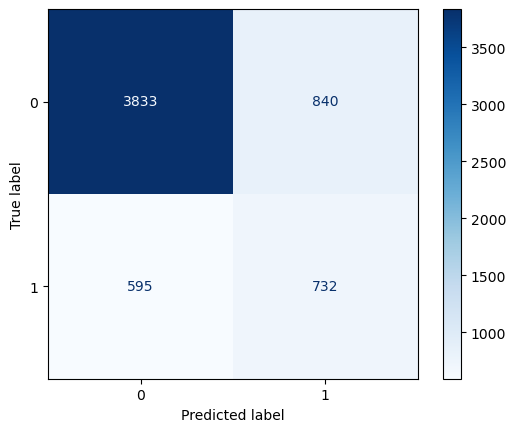

In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = "Blues")

Observations:
- True Negatives (TN): 3,833 → Model correctly classified non-defaulters
- False Positives (FP): 840 → These were misclassified as defaulters
- False Negatives (FN): 595 → These actual defaulters were missed
- True Positives (TP): 732 → Correctly identified defaulters

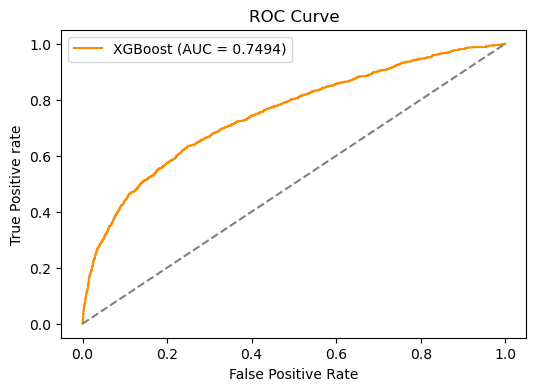

In [18]:
# ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pylab as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = f'XGBoost (AUC = {roc_auc:.4f})', color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Observation:
- AUC = 0.7494, the model is stable and decent
- The curve is above the diagonal baseline, meaning the model is performing significantly better

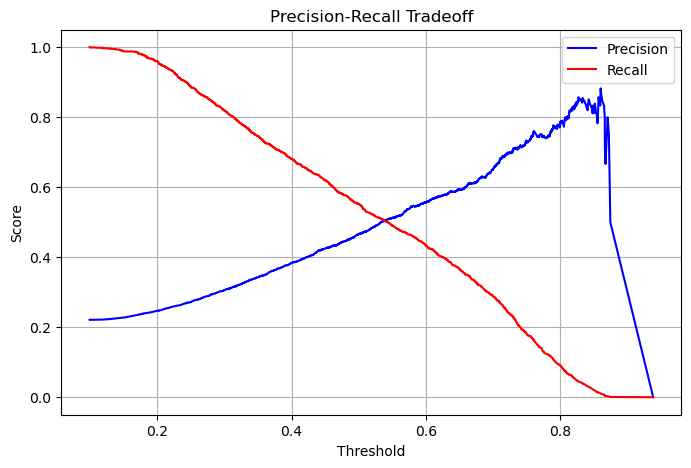

In [19]:
# Computing precision - recall tradeoff at different thresholds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# precision - recall values for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plotting precision-recall vs threshold
plt.figure(figsize = (8, 5))
plt.plot(thresholds, precisions[:-1], label = "Precision", color = "b")
plt.plot(thresholds, recalls[:-1], label = "Recall", color = "r")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Tradeoff")
plt.legend()
plt.grid()
plt.show()

In [23]:
# Calculating F1-score at different thresholds to find the best balance
from sklearn.metrics import f1_score

# different threshold to calculate F1-score
best_threshold = 0.5
best_f1 = 0

for threshold in np.arange(0.1, 0.9, 0.05):
    y_pred_adj = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_adj)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f'Best Threshold: {best_threshold:.2f} with F1-score: {best_f1:.4f}')

Best Threshold: 0.50 with F1-score: 0.5050


Observations:
- Precision increases as the threshold gets higher
- Recall decreases as the threshold increases
- The sweet spot is around 0.50 - balances both


Performance after Threshold Tuning:
Accuracy: 0.7825 | Precision: 0.8235 | Recall: 0.0211 | F1-score: 0.0411 | ROC-AUC: 0.7494


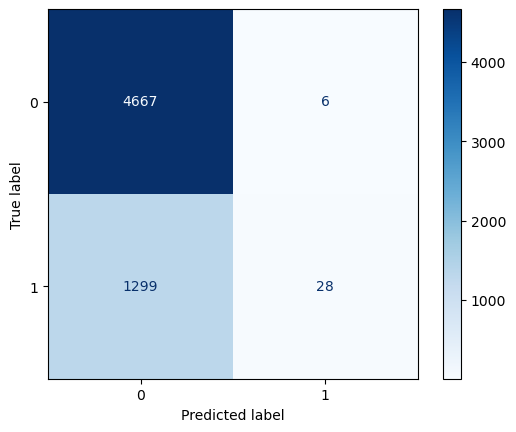

In [25]:
# Recalculating precision, Recall and Confusion Matrix

y_pred_adj = (y_pred_adj >= best_threshold).astype(int)

# Recalculating evaluating metrics
accuracy = accuracy_score(y_test, y_pred_adj)
precision = precision_score(y_test, y_pred_adj)
recall = recall_score(y_test, y_pred_adj)
f1 = f1_score(y_test, y_pred_adj)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance after Threshold Tuning:")
print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-score: {f1:.4f} | ROC-AUC: {roc_auc:.4f}")

# Updating confusion matrix
cm = confusion_matrix(y_test, y_pred_adj)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = "Blues")
plt.show()

Observations:
- True Negatives (TN): 4,667 → Correctly classified non-defaulters
- False Positives (FP): 6 → Very low
- False Negatives (FN): 1,299 → High number of missed defaulters
- True Positives (TP): 28 → Successfully detected defaulters, but very low recall 
- The recall is too low, means many actual fraud cases are missed

In [44]:
#  Lowering the threshold slightly to improve recall and catch more defaulters

new_threshold = 0.40    # Lowering the threshold value
y_pred_adj = (y_pred_proba >= new_threshold).astype(int)

# Recalculating metrics
accuracy = accuracy_score(y_test, y_pred_adj)
precision = precision_score(y_test, y_pred_adj)
recall = recall_score(y_test, y_pred_adj)
f1 = f1_score(y_test, y_pred_adj)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-score: {f1:.4f} | ROC-AUC: {roc_auc:.4f}')

Accuracy: 0.6880 | Precision: 0.3841 | Recall: 0.6805 | F1-score: 0.4910 | ROC-AUC: 0.7494


Accuracy: 0.5487 | Precision: 0.3057 | Recall: 0.8184 | F1-score: 0.4451 | ROC-AUC: 0.7494


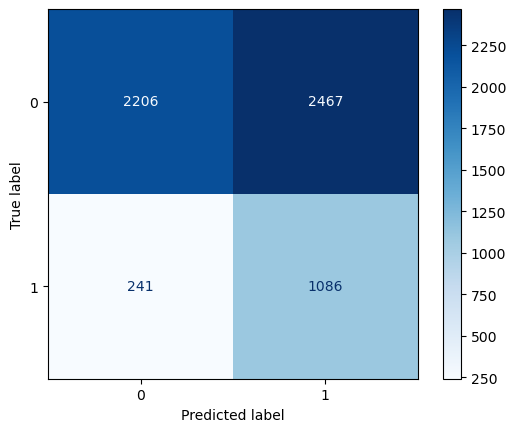

In [46]:
# Lowering the threshold to 0.30
new_threshold = 0.30
y_pred_adj = (y_pred_proba >= new_threshold).astype(int)

# Recalculating metrics
accuracy = accuracy_score(y_test, y_pred_adj)
precision = precision_score(y_test, y_pred_adj)
recall = recall_score(y_test, y_pred_adj)
f1 = f1_score(y_test, y_pred_adj)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-score: {f1:.4f} | ROC-AUC: {roc_auc:.4f}")

# Updating confusion matrix
cm =confusion_matrix(y_test, y_pred_adj)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = "Blues")
plt.show()

Accuracy: 0.6272 | Precision: 0.3426 | Recall: 0.7460 | F1-score: 0.4695 | ROC-AUC: 0.7494


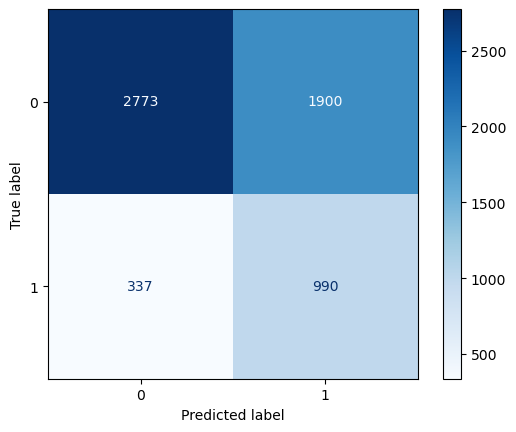

In [45]:
# Lowering the threshold to 0.35
new_threshold = 0.35
y_pred_adj = (y_pred_proba >= new_threshold).astype(int)

# Recalculating metrics
accuracy = accuracy_score(y_test, y_pred_adj)
precision = precision_score(y_test, y_pred_adj)
recall = recall_score(y_test, y_pred_adj)
f1 = f1_score(y_test, y_pred_adj)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-score: {f1:.4f} | ROC-AUC: {roc_auc:.4f}")

# Updating confusion matrix
cm =confusion_matrix(y_test, y_pred_adj)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = "Blues")
plt.show()

Observations:
- Lowering Threshold to 0.35 increased the recall to 74.60% compared to 0.40 which is 68.05%
- Precision slightly dropped - classifying more defaulters
- F1-score is still high 0.4695 - it's a good balance between precision and recall

### Comparing XGBoost (Threshold = 0.35) vs. Random Forest

- XGBoost's recall is 74.6% is now higher than the Random Forest's recall 48.2%
- Random Forest still has higher precision of 52.0% vs. XGBoost's precision which is 34.2% (RF makes fewer false positive)
- XGBoost's ROC-AUC is 0.7494 is now slightly higher than RF's 0.7389
- Accuracy dropped for XGBoost 62.7% while RF's 78.7%

Conclusion
- If we prioritize interpretability & stability → Random Forest is the safer choice
- If we want better recall (catching more defaulters) → XGBoost (with tuned threshold) is better

In [47]:
# Save trained models
joblib.dump(rf, os.path.join(model_path, "random_forest_model.pkl"))
joblib.dump(xgb_model, os.path.join(model_path, "xgboost_model.pkl"))

print("Models Saved Successfully!")

Models Saved Successfully!
